# Explore here

**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from pickle import dump

**Importing the data**

In [2]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'

raw_data = pd.read_csv(url)
raw_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df = raw_data[['Latitude', 'Longitude', 'MedInc']].copy()

**Splitting the data**

In [5]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

X_train: (16512, 3)
X_test: (4128, 3)


**Building the K_Means model**

In [7]:
model=KMeans(n_clusters=6, random_state=42, n_init='auto')
model.fit(X_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [8]:
model.labels_

array([3, 1, 1, ..., 3, 0, 5], dtype=int32)

In [9]:
clusters = model.cluster_centers_

In [10]:
X_train['cluster'] = pd.Series(model.predict(X_train), index=X_train.index)

In [11]:
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


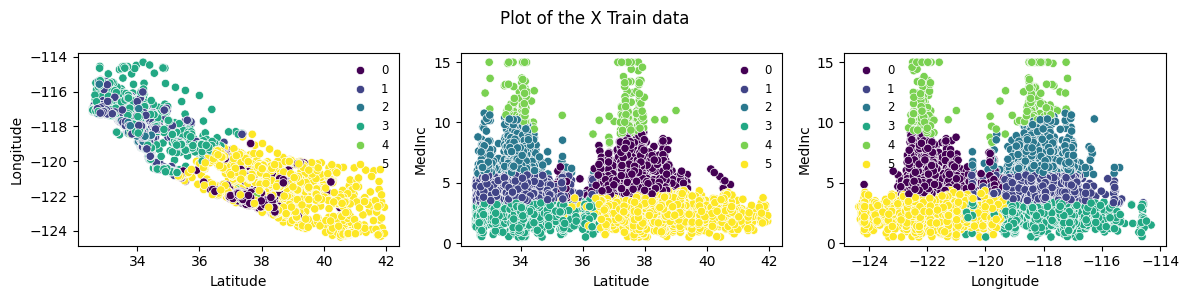

In [12]:
fig, axis = plt.subplots(1, 3, figsize=(12,3))

sns.scatterplot(ax=axis[0], data=X_train, x='Latitude', y='Longitude', hue='cluster', palette='viridis')
sns.scatterplot(ax=axis[1], data=X_train, x='Latitude', y='MedInc', hue='cluster', palette='viridis')
sns.scatterplot(ax=axis[2], data=X_train, x='Longitude', y='MedInc', hue='cluster', palette='viridis')
axis[0].legend(frameon=False, fontsize='small')
axis[1].legend(frameon=False, fontsize='small')
axis[2].legend(frameon=False, fontsize='small')

plt.suptitle('Plot of the X Train data')
plt.tight_layout()
plt.show() 

**Predicting with test data**

In [13]:
X_test['cluster'] = pd.Series(model.predict(X_test), index=X_test.index)

In [14]:
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


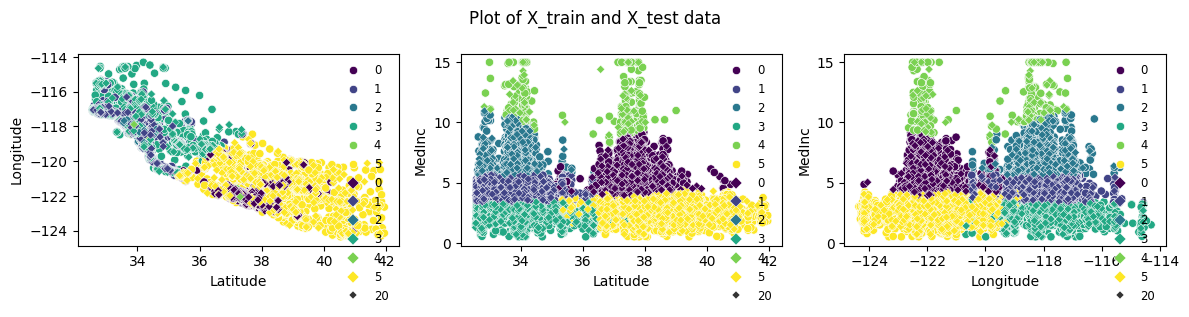

In [15]:
fig, axis = plt.subplots(1, 3, figsize=(12,3))

sns.scatterplot(ax=axis[0], data=X_train, x='Latitude', y='Longitude', hue='cluster', palette='viridis')
sns.scatterplot(ax=axis[1], data=X_train, x='Latitude', y='MedInc', hue='cluster', palette='viridis')
sns.scatterplot(ax=axis[2], data=X_train, x='Longitude', y='MedInc', hue='cluster', palette='viridis')

sns.scatterplot(ax=axis[0], data=X_test, x='Latitude', y='Longitude', hue='cluster', palette='viridis', marker='D', size=20)
sns.scatterplot(ax=axis[1], data=X_test, x='Latitude', y='MedInc', hue='cluster', palette='viridis', marker='D', size=20)
sns.scatterplot(ax=axis[2], data=X_test, x='Longitude', y='MedInc', hue='cluster', palette='viridis', marker='D', size=20)

axis[0].legend(frameon=False, fontsize='small')
axis[1].legend(frameon=False, fontsize='small')
axis[2].legend(frameon=False, fontsize='small')
axis[0].legend(frameon=False, fontsize='small')
axis[1].legend(frameon=False, fontsize='small')
axis[2].legend(frameon=False, fontsize='small')

plt.suptitle('Plot of X_train and X_test data')
plt.tight_layout()
plt.show() 

**Building the Random Forest model**

In [16]:
X_sup_train = X_train.drop('cluster', axis=1)
y_sup_train = X_train.cluster
X_sup_test = X_test.drop('cluster', axis=1)
y_sup_test = X_test.cluster

In [17]:
model_sup = RandomForestClassifier(random_state=42)
model_sup.fit(X_sup_train, y_sup_train)

RandomForestClassifier(random_state=42)

In [18]:
y_sup_train_pred = model.predict(X_sup_train)
y_sup_test_pred = model.predict(X_sup_test)

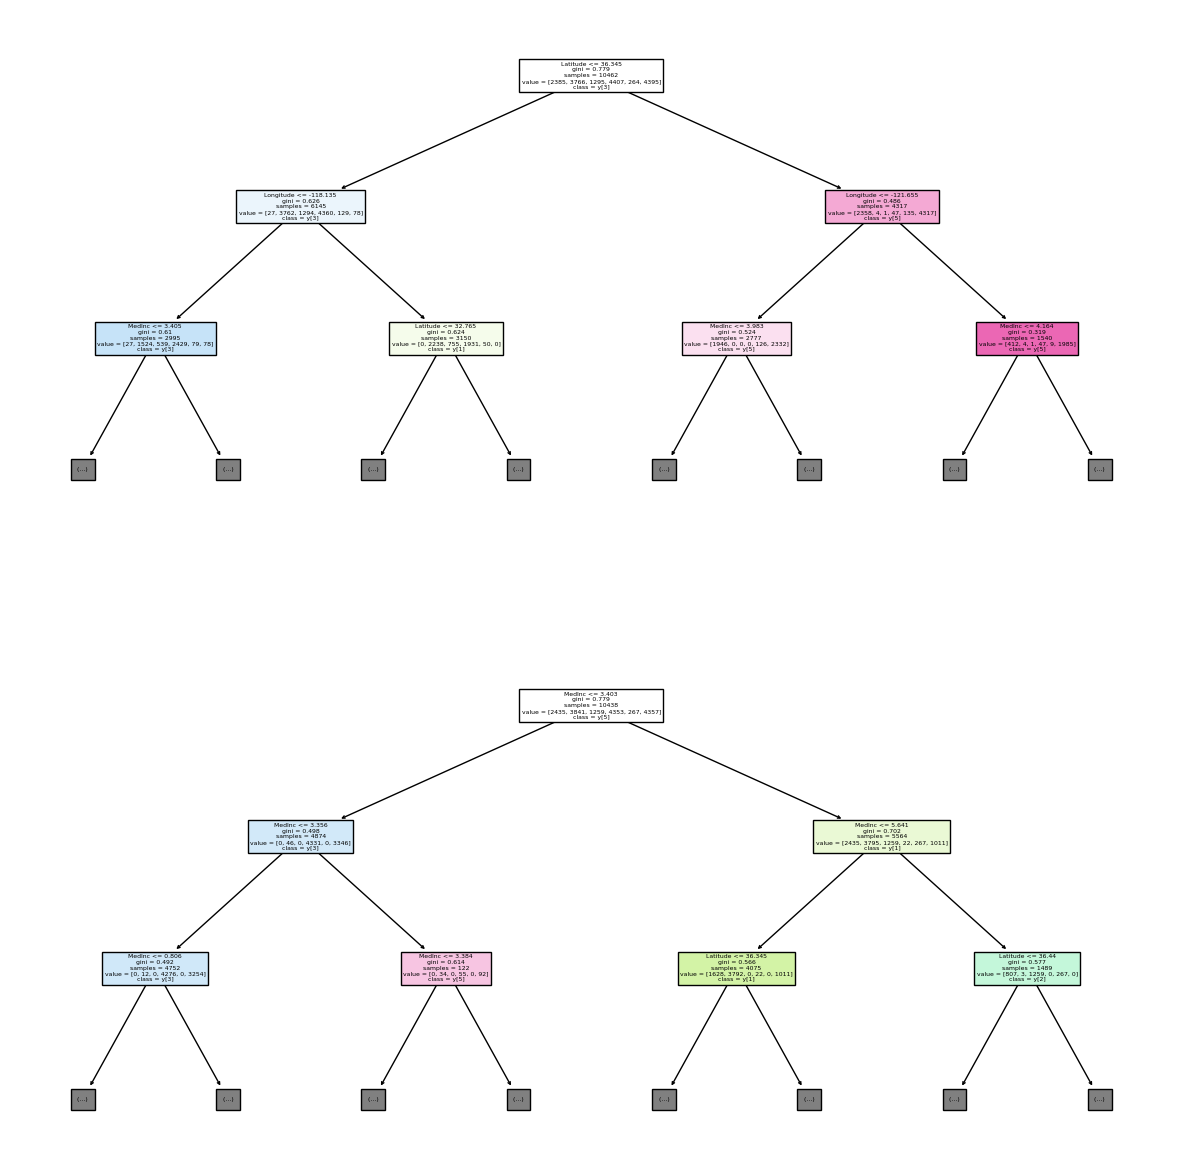

In [19]:
fig, axis = plt.subplots(2, figsize=(15,15))
tree.plot_tree(model_sup.estimators_[0], ax = axis[0], feature_names = X_sup_train.columns, class_names = True, filled = True, max_depth=2)
tree.plot_tree(model_sup.estimators_[1], ax = axis[1], feature_names = X_sup_train.columns, class_names = True, filled = True, max_depth=2)
plt.show()

In [20]:
#Evaluation of the model
accuracy_train = accuracy_score(y_sup_train, y_sup_train_pred)
f1_train = f1_score(y_sup_train, y_sup_train_pred, average='macro')
print(f'Accuracy on train data is {accuracy_train:.2f}')
print(f'F1 Score on train data is {f1_train:.2f}')
accuracy_predict = accuracy_score(y_sup_test, y_sup_test_pred)
f1_test = f1_score(y_sup_test, y_sup_test_pred, average='macro')
print(f'Accuracy on test data is {accuracy_predict:.2f}')
print(f'F1 Score on test data is {f1_test:.2f}')

Accuracy on train data is 1.00
F1 Score on train data is 1.00
Accuracy on test data is 1.00
F1 Score on test data is 1.00


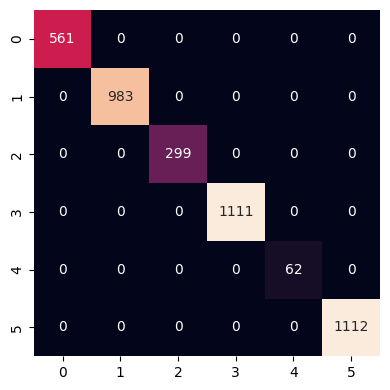

In [21]:
cm = confusion_matrix(y_sup_test, y_sup_test_pred)

cm_df = pd.DataFrame(cm)

plt.figure(figsize=(4,4))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)
plt.tight_layout()
plt.show()

**Saving the models**

In [22]:
dump(model, open("../models/kmeans_real_estate.sav", "wb"))
dump(model_sup, open("../models/random_forest_classifier_real_estate.sav", "wb"))